<a href="https://colab.research.google.com/github/Swathi12499/DataAnalytics/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df=pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','class'])

In [0]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x=df.loc[:,features].values
y=df.loc[:,['class']].values

In [0]:
print(x[:5,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [0]:
x=StandardScaler().fit_transform(x)
print(x[:5,:])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [0]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principlecomp=pca.fit_transform(x)

In [0]:
principalDF=pd.DataFrame(data=principlecomp,columns=['PC1','PC2'])
PrincipalDf = pd.concat([principalDF, df[['class']]], axis = 1)
print(PrincipalDf.tail())


          PC1       PC2           class
145  1.870522  0.382822  Iris-virginica
146  1.558492 -0.905314  Iris-virginica
147  1.520845  0.266795  Iris-virginica
148  1.376391  1.016362  Iris-virginica
149  0.959299 -0.022284  Iris-virginica


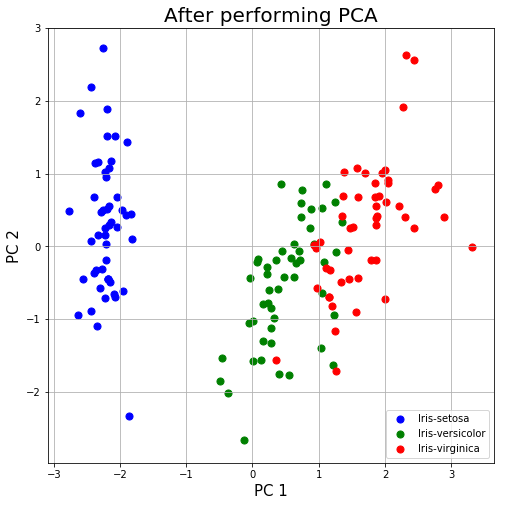

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('After performing PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['b', 'g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = PrincipalDf['class'] == target
    ax.scatter(PrincipalDf.loc[indicesToKeep, 'PC1']
               , PrincipalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()